In [7]:
from matplotlib import pyplot as plt
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangularReadoutPulse
from cycler import cycler
from tqdm import tqdm
import numpy as np


In [8]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['axes.prop_cycle'] = cycler(color=['#669bbc', '#60d394', '#ee6055', ])

In [9]:
# current_path = os.path.abspath("")
# data_dir_path = os.path.join(current_path, "data")
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_shifted_mock_156_kHz_cut.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_cut.s2p"
# )
#
# shift_f = 156 * 10 ** 3
# f_state_0 = 7.2669 * 10 ** 9
# pulse_frequency = f_state_0 + shift_f / 2


In [10]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
s_parameters_file_state_1 = os.path.join(
    data_dir_path,
    "data_00000_1_ghz.s2p",
)
s_parameters_file_state_0 = os.path.join(
    data_dir_path,
    "data_00000_0_ghz.s2p"
)

pulse_frequency = 6.065212860 * 10 ** 9
default_pulse_samples_number = 2 ** 17
default_pulse_length = 2e-6


def run(pulse_length=default_pulse_length, pulse_samples_number=default_pulse_samples_number):
    rect_readout_pulse = RectangularReadoutPulse(
        carrier_frequency=pulse_frequency,
        pulse_duration=pulse_length,
        pulse_power_dbm=-132,
        total_signal_time=pulse_length,
        pulse_samples_number=pulse_samples_number,
    )

    # rect_readout_pulse.plot_pulse()

    fidelity_simulation = FidelitySimulation(
        s_parameters_file_state_0=s_parameters_file_state_0,
        s_parameters_file_state_1=s_parameters_file_state_1,
        readout_pulse=rect_readout_pulse,
        IQ_projection_frequency=6.2e9,  # f_fi = 200MHz
        num_iterations=100,
        readout_dt=1e-9,
        plot_pulses=False,
        plot_result=False,
        disable_progress_bar=True,
    )

    fidelity = fidelity_simulation.run()

    # print("fidelity =", fidelity)
    return fidelity


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]

CPU times: user 2.85 s, sys: 2.07 s, total: 4.91 s
Wall time: 19.3 s


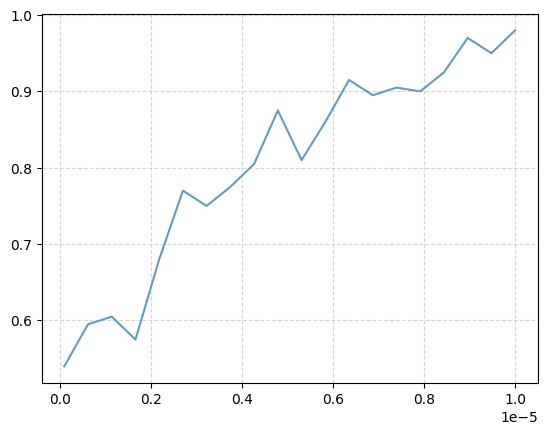

In [11]:
%%time
result = []
values = np.linspace(0.1, 10, 20) * 10 ** (-6)

for value in tqdm(values):
    result.append(run(pulse_length=value))
plt.plot(values, result)

100%|██████████| 100/100 [03:53<00:00,  2.33s/it]

CPU times: user 32.2 s, sys: 9.75 s, total: 41.9 s
Wall time: 3min 53s


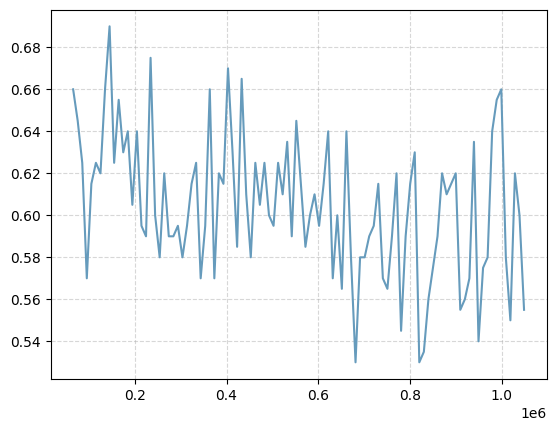

In [12]:
%%time
result = []
values = np.linspace(2**16, 2**20, 100)

for value in tqdm(values):
    result.append(run(pulse_samples_number=int(value)))
plt.plot(values, result)